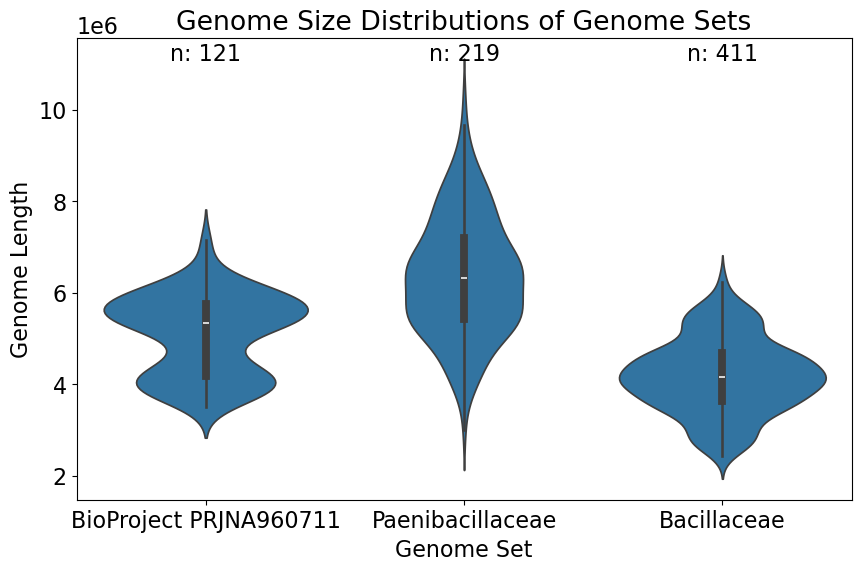

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the TSV files
bioproject_PRJNA960711 = pd.read_csv('../../data/bioproject_PRJNA960711_genomes.tsv', sep='\t')
paenibacillaceae = pd.read_csv('../../data/paenibacillaceae_reference_genomes.tsv', sep='\t')
bacillaceae = pd.read_csv('../../data/bacillaceae_reference_genomes.tsv', sep='\t')

# Extract the length column and combine the data into a single DataFrame
df = pd.concat([
    bioproject_PRJNA960711[['Organism Infraspecific Names Strain','Assembly Stats Total Sequence Length']]
    .rename(columns={'Organism Infraspecific Names Strain':'Strain','Assembly Stats Total Sequence Length':'Length'})
    .assign(Set='BioProject PRJNA960711'),

    paenibacillaceae[['Organism Infraspecific Names Strain','Assembly Stats Total Sequence Length']]
    .rename(columns={'Organism Infraspecific Names Strain':'Strain','Assembly Stats Total Sequence Length':'Length'})
    .assign(Set='Paenibacillaceae'),

    bacillaceae[['Organism Infraspecific Names Strain','Assembly Stats Total Sequence Length']]
    .rename(columns={'Organism Infraspecific Names Strain':'Strain','Assembly Stats Total Sequence Length':'Length'})
    .assign(Set='Bacillaceae'),

], ignore_index=True)

df = df.drop_duplicates(subset=['Strain'])

counts = df['Set'].value_counts()

# Convert the index (which contains the 'Set' names) to a categorical type with custom order
counts.index = pd.Categorical(counts.index, categories=['BioProject PRJNA960711', 'Paenibacillaceae', 'Bacillaceae'], ordered=True)

# # Sort the counts based on the custom order
counts = counts.sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Set', y='Length', data=df)

# Customize the plot
plt.title('Genome Size Distributions of Genome Sets')
plt.xlabel('Genome Set')
plt.ylabel('Genome Length')

# Adjust y-axis to scientific notation if numbers are large
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))

for i, (set_name, count) in enumerate(counts.items()):
    plt.annotate(f'n: {count}', (i, plt.ylim()[1]), xytext=(0, -20), 
                 textcoords='offset points', ha='center', va='bottom')
    
# Save the plot
plt.savefig('../../figures/genome_length_violin_plots.png', dpi=300)

# Show the plot
plt.show()